# Bulldozer Sale Price prediction

- Using Machine Learning to predict Bulldozer sale prices.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import data

data = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")

/var/folders/5v/pp72n15j4q55cmx3_d1bb1600000gn/T/ipykernel_31244/2116786626.py:3: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")


In [3]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(412698, 53)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

##### Parse dates "saledate"
For time series data, its advisable to ensure the format of a datetime object.

> using df = pd.cs("......", low_memory=False, parse_dates=["saledate"])



In [6]:
data = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                  low_memory=False,
                  parse_dates=["saledate"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

## EDA - Exploratory data analysis

In [8]:
data.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

The has lot of features with null values which can be unuseful.

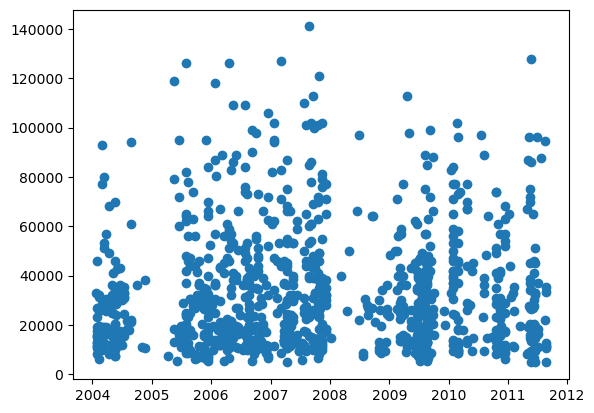

In [9]:
fig, ax = plt.subplots()
ax.scatter(data["saledate"][:1000], data["SalePrice"][:1000])

#### Predciting future examples based on past examples
- So we will sort the data by the 'saledate'

In [10]:
data.sort_values(by=["saledate"],inplace=True,ascending=True)

In [11]:
data.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
df = data.copy() #copy of the original data

In [13]:
# Adding new date related columns

df['sale_year']=df.saledate.dt.year
df['sale_month']=df.saledate.dt.month
df['sale_day']=df.saledate.dt.day
df['sale_dayofweek']=df.saledate.dt.dayofweek
df['sale_dayofyear']=df.saledate.dt.dayofyear


df.drop("saledate",axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [15]:
 df.state.value_counts() #unique state values

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

In [16]:
# Spliting Data and target 'SalePrice'
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

In [17]:
print(X.shape, y.shape)

(412698, 56) (412698,)


In [18]:
# Convert string values into categories

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

### Filling in missing values

In [20]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sale_year,sale_month,sale_day,sale_dayofweek,sale_dayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [21]:
df['Blade_Type'].dtype

CategoricalDtype(categories=['Angle', 'Coal', 'Landfill', 'No', 'None or Unspecified',
                  'PAT', 'Semi U', 'Straight', 'U', 'VPAT'],
, ordered=True)

In [22]:
## Features with int64 dtype and have null values

for col in df:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64' :
        column = col        
        if df[column].isnull().sum() > 0:
            print (column)

auctioneerID
MachineHoursCurrentMeter


- 'auctioneerID' and 'MachineHoursCurrentMeter' feature have numerical values with null entries. We will replace those null entries using a suitable parameter.

In [23]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())


In [24]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,sale_year,sale_month,sale_day,sale_dayofweek,sale_dayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,NaN,D38E,...,None or Unspecified,NaN,NaN,2012,4,28,5,119,False,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,NaN,2064,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,NaN,337G,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,NaN,12G,...,NaN,NaN,NaN,2012,4,28,5,119,False,True


In [25]:
for col in df:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64' :
        column = col        
        if df[column].isnull().sum() > 0:
            print (column)

- After replacing all null values there are no feature with null entries.
- To retain information, we created new feature to show whether the value was missing or not in the original data. There could also be a reason why the information was absent in the first place!

In [26]:
## Features with dtype other than numeric types:

for col in df:
    if df[col].dtype != 'int64' or df[col].dtype != 'float64' :
        column = col        
        if df[column].isnull().sum() > 0:
            print (column)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1        


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [29]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sale_year,sale_month,sale_day,sale_dayofweek,sale_dayofyear
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,412698.000000,412698.000000,4.126980e+05,412698.000000,412698.000000,...,412698.00000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.361548,1899.049637,1.259165e+03,0.413486,1697.462231,...,0.19562,1.273566,1.126720,0.684513,0.345611,2004.317382,6.300268,16.152894,2.594338,176.784094
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,16.763713,292.190243,1.633077e+04,0.941340,1281.860399,...,0.39680,2.644549,2.301722,1.503114,0.756225,5.821090,3.437276,8.429510,1.417971,103.910718
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,0.000000,1.000000
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,0.000000,640.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,9.000000,2.000000,82.000000
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000000,1413.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2006.000000,6.000000,16.000000,3.000000,165.000000
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,0.000000e+00,0.000000,2316.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2009.000000,9.000000,23.000000,3.000000,270.000000
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,3.000000,5059.000000,...,2.00000,10.000000,7.000000,4.000000,5.000000,2012.000000,12.000000,31.000000,6.000000,365.000000


Now all values and features are in numerical values and we can proceed with machine learning

In [30]:
#Splitting Features and target

X = df.drop(columns='SalePrice')
y = df.SalePrice

In [31]:
X.shape, y.shape

((412698, 102), (412698,))

In [32]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1) ## Creating a subset of rows to reduce the computing time

# Fit Model
model.fit(X,y)

CPU times: user 12min 52s, sys: 5.71 s, total: 12min 58s
Wall time: 1min 46s


RandomForestRegressor(n_jobs=-1)

In [33]:
# Model Score

model.score(X,y)

0.9875716435042142

In [36]:
# Since this is a time-series problem we will divide the datasets using dates instead of the tradiitional random train test split

df.sale_year.value_counts(ascending=True)

1990     4529
1989     4806
1991     5109
1992     5519
1993     6303
1994     7929
1995     8530
1996     8829
1997     9785
2012    11573
1999    12793
1998    13046
2003    15254
2002    17246
2000    17415
2001    17594
2004    19879
2005    20463
2006    21685
2007    32208
2010    33390
2011    35197
2008    39767
2009    43849
Name: sale_year, dtype: int64

In [37]:
# Splitting data into train and validation
val = df[df['sale_year']==2012]
train = df[df['sale_year']!=2012]

In [40]:
val.shape, train.shape

((11573, 103), (401125, 103))

In [41]:
X_train, y_train = train.drop(columns='SalePrice'), train['SalePrice']
X_val, y_val = val.drop(columns='SalePrice'), val['SalePrice']

In [42]:
X_train.shape,y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

#### Evaluation Function
- Root mean square log error RMSLE
- Scikit-learn does not have a function for RMSLE

In [43]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [44]:
# RMSLE functions

def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

In [50]:
def model_scores(model):
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    scores = {"Train Score": model.score(X_train,y_train),
             "Val Score": model.score(X_val,y_val),
             "Train RMSLE": rmsle(y_train, train_pred),
             "Val RMSLE": rmsle(y_val, val_pred),
             "Train MAE": mean_absolute_error(y_train, train_pred),
             "Val MAE": mean_absolute_error(y_val, val_pred)}
    return scores

### Testing the model (on a subset)

Since the dataset length is quiet big (~40,000) the takes longer to fit.

In [51]:
# Setting the maximum samples for the model 

model = RandomForestRegressor(n_jobs=-1,
                             max_samples=10000)

In [52]:
%%time

model.fit(X_train,y_train) # fitting the model

CPU times: user 27.2 s, sys: 393 ms, total: 27.6 s
Wall time: 5.78 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [53]:
model_scores(model)

{'Train Score': 0.8609670920731114,
 'Val Score': 0.8345258303469592,
 'Train RMSLE': 0.2570706573275157,
 'Val RMSLE': 0.29094690077553087,
 'Train MAE': 5553.983109703957,
 'Val MAE': 7107.497254817247}

#### Hyperparameter tuning using RandomizedSearchCV

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
%%time


rfr_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rfr_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rfr_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rfr_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 7min 32s, sys: 6.69 s, total: 7min 39s
Wall time: 7min 39s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [57]:
rfr_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [58]:
model_scores(rfr_model)

{'Train Score': 0.8456732540281521,
 'Val Score': 0.8202535784860039,
 'Train RMSLE': 0.2680002701341224,
 'Val RMSLE': 0.2991049462385742,
 'Train MAE': 5851.899688224717,
 'Val MAE': 7386.63875156094}

#### Training model with best parameters

In [62]:
ideal_model = RandomForestRegressor(n_estimators = 90,
                                    min_samples_split = 18,
                                    min_samples_leaf = 1,
                                    max_samples = None,
                                    max_features = 'auto',
                                    max_depth = None)

In [63]:
ideal_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=18, n_estimators=90)

In [65]:
model_scores(ideal_model)

{'Train Score': 0.9549689713382568,
 'Val Score': 0.8734300152089627,
 'Train RMSLE': 0.14981854822800866,
 'Val RMSLE': 0.2523117978124126,
 'Train MAE': 3076.427359597444,
 'Val MAE': 6106.174717000147}

The model has improved a lot from hyperparameter tuning but the model takes a long time.

One way to reduce the time is to reduce the number of n_estimators

In [66]:
faster_model = RandomForestRegressor(n_estimators = 40,
                                    min_samples_split = 18,
                                    min_samples_leaf = 3,
                                    max_samples = None,
                                    max_features = 'auto',
                                    max_depth = None,
                                    n_jobs=-1)

In [67]:
faster_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=18, n_estimators=40,
                      n_jobs=-1)

In [68]:
model_scores(faster_model)

{'Train Score': 0.9480363096501275,
 'Val Score': 0.8713292353726763,
 'Train RMSLE': 0.1590904469999327,
 'Val RMSLE': 0.25237361603538333,
 'Train MAE': 3239.558463266338,
 'Val MAE': 6118.028000134712}

### Predicting on test data

In [79]:
# Importing test datasets

df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", parse_dates=["saledate"])

In [80]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [82]:
# Preprocessing the test data and filling in null values

def preprocess_data(df):
    # Add datetime parameters for saledate
    df['sale_year']=df.saledate.dt.year
    df['sale_month']=df.saledate.dt.month
    df['sale_day']=df.saledate.dt.day
    df['sale_dayofweek']=df.saledate.dt.dayofweek
    df['sale_dayofyear']=df.saledate.dt.dayofyear
    
    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [83]:
preprocess_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


- Here df_test is basically X_test on which the model will be tested.

In [86]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [88]:
# we will add {'auctioneerID_is_missing'} set to False in df_test, since the feature has no missing value in the dataset.

df_test['auctioneerID_is_missing'] = False


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [90]:
test_pred = ideal_model.predict(df_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### Feature Importance

In [95]:
ideal_model.feature_importances_

array([4.65590825e-02, 1.13674590e-02, 3.21944614e-02, 1.57353621e-04,
       2.80202761e-03, 2.73435448e-01, 2.24299757e-03, 7.30542091e-04,
       1.92632781e-02, 8.41792452e-02, 5.31635204e-02, 4.26642512e-03,
       3.30238032e-03, 2.38356066e-01, 4.08922339e-02, 5.48181570e-03,
       1.30751457e-04, 1.99491647e-04, 1.75826581e-03, 8.59216764e-03,
       2.77717473e-04, 2.16200865e-05, 4.52542493e-04, 1.49200006e-04,
       1.26542654e-03, 2.10389980e-05, 7.58738652e-04, 4.74098329e-03,
       1.34433619e-03, 3.52343729e-05, 4.68392885e-03, 1.94117329e-03,
       1.99757612e-03, 2.95840652e-03, 1.41619614e-04, 1.34377391e-03,
       6.47149789e-04, 1.68145291e-02, 7.41085646e-06, 6.52537728e-06,
       1.30655697e-04, 7.94321650e-04, 8.88557401e-04, 5.34721798e-04,
       1.61774584e-04, 2.86870369e-04, 2.90610319e-04, 1.24607934e-03,
       8.24699900e-04, 1.24246034e-04, 1.76667597e-04, 7.72442690e-02,
       1.47988354e-03, 5.02075747e-03, 2.46476963e-03, 1.12228242e-02,
      

In [96]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

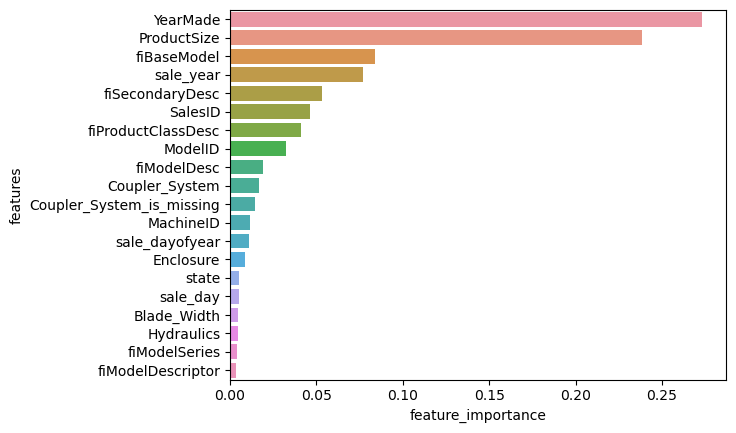

In [97]:
plot_features(X_train.columns, ideal_model.feature_importances_)